
## Image Classfication


## Importing the libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, Conv2D, Conv3D, Dropout, MaxPooling1D, MaxPooling2D, MaxPooling3D, AveragePooling1D, AveragePooling2D, AveragePooling3D, BatchNormalization


2022-01-24 19:04:25.327267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 19:04:25.327288: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Start stopwatch

In [2]:

from time import process_time
time_start = process_time() 


## Import the dataset

In [3]:

X = pd.read_csv('/home/vitor/Documents/TACS/MLhub/data/cnn/features.csv')
y = pd.read_csv('/home/vitor/Documents/TACS/MLhub/data/cnn/labels.csv')


## Splitting the dataset into the Training set and Test set

In [4]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1,
                        train_size=None,
                        random_state=0,
                        shuffle=0,
                        stratify=X if "None" == "features" else y if "None" == "labels" else None)
y_true = y_test


## Data preprocessing

In [5]:

def data_preprocessing(X, y):

    out_y = keras.utils.to_categorical(y)

    num_images = X.shape[0]
    x_as_array = X.values[:,0:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

X_train, y_train = data_preprocessing(X_train, y_train)
X_test, y_test = data_preprocessing(X_test, y_test)


## Build the model

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=[3, 3], activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D([2, 2]))
model.add(Conv2D(64, kernel_size=[3, 3], activation="relu"))
model.add(MaxPooling2D([2, 2]))
model.add(Conv2D(128, kernel_size=[3, 3], activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))


model.compile(
            loss=keras.losses.CategoricalCrossentropy(),
            optimizer=keras.optimizers.Adam(),
            metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

2022-01-24 19:04:27.633290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-24 19:04:27.633315: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-24 19:04:27.633332: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vitor-x1): /proc/driver/nvidia/version does not exist
2022-01-24 19:04:27.633551: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the model on the Training set

In [7]:

history = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=2,
                  validation_split=0.1)


Epoch 1/2


  1/254 [..............................] - ETA: 1:20 - loss: 2.2942 - accuracy: 0.1406

  4/254 [..............................] - ETA: 5s - loss: 2.2459 - accuracy: 0.2969  

  7/254 [..............................] - ETA: 5s - loss: 2.1629 - accuracy: 0.3638

  9/254 [>.............................] - ETA: 6s - loss: 2.0796 - accuracy: 0.3950

 11/254 [>.............................] - ETA: 6s - loss: 1.9853 - accuracy: 0.4240

 13/254 [>.............................] - ETA: 6s - loss: 1.9000 - accuracy: 0.4261

 15/254 [>.............................] - ETA: 6s - loss: 1.8200 - accuracy: 0.4406

 17/254 [=>............................] - ETA: 6s - loss: 1.7266 - accuracy: 0.4568

 19/254 [=>............................] - ETA: 6s - loss: 1.6591 - accuracy: 0.4667

 21/254 [=>............................] - ETA: 6s - loss: 1.6050 - accuracy: 0.4784

 23/254 [=>............................] - ETA: 7s - loss: 1.5594 - accuracy: 0.4929

 25/254 [=>............................] - ETA: 7s - loss: 1.5254 - accuracy: 0.5006

 27/254 [==>...........................] - ETA: 6s - loss: 1.4841 - accuracy: 0.5116

 29/254 [==>...........................] - ETA: 6s - loss: 1.4500 - accuracy: 0.5183

 31/254 [==>...........................] - ETA: 6s - loss: 1.4201 - accuracy: 0.5280

 33/254 [==>...........................] - ETA: 6s - loss: 1.3906 - accuracy: 0.5360

 35/254 [===>..........................] - ETA: 6s - loss: 1.3615 - accuracy: 0.5451

 37/254 [===>..........................] - ETA: 6s - loss: 1.3310 - accuracy: 0.5543

 39/254 [===>..........................] - ETA: 6s - loss: 1.3057 - accuracy: 0.5615

 41/254 [===>..........................] - ETA: 6s - loss: 1.2834 - accuracy: 0.5663

 43/254 [====>.........................] - ETA: 6s - loss: 1.2600 - accuracy: 0.5725

 45/254 [====>.........................] - ETA: 6s - loss: 1.2413 - accuracy: 0.5783

 47/254 [====>.........................] - ETA: 6s - loss: 1.2252 - accuracy: 0.5839

 49/254 [====>.........................] - ETA: 6s - loss: 1.2100 - accuracy: 0.5879

 51/254 [=====>........................] - ETA: 6s - loss: 1.1924 - accuracy: 0.5934

 53/254 [=====>........................] - ETA: 6s - loss: 1.1758 - accuracy: 0.5960

 55/254 [=====>........................] - ETA: 6s - loss: 1.1591 - accuracy: 0.6000

 57/254 [=====>........................] - ETA: 6s - loss: 1.1462 - accuracy: 0.6032

 59/254 [=====>........................] - ETA: 6s - loss: 1.1304 - accuracy: 0.6079

 61/254 [======>.......................] - ETA: 6s - loss: 1.1157 - accuracy: 0.6127

 63/254 [======>.......................] - ETA: 6s - loss: 1.1047 - accuracy: 0.6153

 65/254 [======>.......................] - ETA: 6s - loss: 1.0918 - accuracy: 0.6184

 67/254 [======>.......................] - ETA: 6s - loss: 1.0809 - accuracy: 0.6212

 69/254 [=======>......................] - ETA: 6s - loss: 1.0683 - accuracy: 0.6258

 71/254 [=======>......................] - ETA: 6s - loss: 1.0574 - accuracy: 0.6296

 73/254 [=======>......................] - ETA: 5s - loss: 1.0481 - accuracy: 0.6330

 75/254 [=======>......................] - ETA: 5s - loss: 1.0417 - accuracy: 0.6347

 77/254 [========>.....................] - ETA: 5s - loss: 1.0339 - accuracy: 0.6372

 79/254 [========>.....................] - ETA: 5s - loss: 1.0278 - accuracy: 0.6375

 81/254 [========>.....................] - ETA: 5s - loss: 1.0199 - accuracy: 0.6399

 83/254 [========>.....................] - ETA: 5s - loss: 1.0139 - accuracy: 0.6419

 85/254 [=========>....................] - ETA: 5s - loss: 1.0075 - accuracy: 0.6448

 87/254 [=========>....................] - ETA: 5s - loss: 0.9992 - accuracy: 0.6476

 89/254 [=========>....................] - ETA: 5s - loss: 0.9928 - accuracy: 0.6497

 91/254 [=========>....................] - ETA: 5s - loss: 0.9829 - accuracy: 0.6532

 92/254 [=========>....................] - ETA: 5s - loss: 0.9789 - accuracy: 0.6546

 94/254 [==========>...................] - ETA: 5s - loss: 0.9723 - accuracy: 0.6563

 96/254 [==========>...................] - ETA: 5s - loss: 0.9641 - accuracy: 0.6590

 98/254 [==========>...................] - ETA: 5s - loss: 0.9586 - accuracy: 0.6610

100/254 [==========>...................] - ETA: 5s - loss: 0.9527 - accuracy: 0.6626

102/254 [===========>..................] - ETA: 5s - loss: 0.9467 - accuracy: 0.6644

104/254 [===========>..................] - ETA: 5s - loss: 0.9396 - accuracy: 0.6665

106/254 [===========>..................] - ETA: 5s - loss: 0.9335 - accuracy: 0.6683

108/254 [===========>..................] - ETA: 5s - loss: 0.9291 - accuracy: 0.6694

110/254 [===========>..................] - ETA: 4s - loss: 0.9238 - accuracy: 0.6710

112/254 [============>.................] - ETA: 4s - loss: 0.9174 - accuracy: 0.6726

114/254 [============>.................] - ETA: 4s - loss: 0.9116 - accuracy: 0.6746

116/254 [============>.................] - ETA: 4s - loss: 0.9070 - accuracy: 0.6764

118/254 [============>.................] - ETA: 4s - loss: 0.9011 - accuracy: 0.6782

120/254 [=============>................] - ETA: 4s - loss: 0.8948 - accuracy: 0.6800

122/254 [=============>................] - ETA: 4s - loss: 0.8898 - accuracy: 0.6815

124/254 [=============>................] - ETA: 4s - loss: 0.8839 - accuracy: 0.6836

126/254 [=============>................] - ETA: 4s - loss: 0.8787 - accuracy: 0.6853

128/254 [==============>...............] - ETA: 4s - loss: 0.8735 - accuracy: 0.6868

130/254 [==============>...............] - ETA: 4s - loss: 0.8710 - accuracy: 0.6876

132/254 [==============>...............] - ETA: 4s - loss: 0.8667 - accuracy: 0.6889

134/254 [==============>...............] - ETA: 4s - loss: 0.8620 - accuracy: 0.6902

136/254 [===============>..............] - ETA: 4s - loss: 0.8579 - accuracy: 0.6916

138/254 [===============>..............] - ETA: 4s - loss: 0.8539 - accuracy: 0.6927

140/254 [===============>..............] - ETA: 3s - loss: 0.8487 - accuracy: 0.6944

142/254 [===============>..............] - ETA: 3s - loss: 0.8449 - accuracy: 0.6954

144/254 [================>.............] - ETA: 3s - loss: 0.8403 - accuracy: 0.6968

146/254 [================>.............] - ETA: 3s - loss: 0.8355 - accuracy: 0.6984

148/254 [================>.............] - ETA: 3s - loss: 0.8310 - accuracy: 0.7001

150/254 [================>.............] - ETA: 3s - loss: 0.8266 - accuracy: 0.7019

152/254 [================>.............] - ETA: 3s - loss: 0.8230 - accuracy: 0.7028

154/254 [=================>............] - ETA: 3s - loss: 0.8197 - accuracy: 0.7038

156/254 [=================>............] - ETA: 3s - loss: 0.8152 - accuracy: 0.7052

158/254 [=================>............] - ETA: 3s - loss: 0.8114 - accuracy: 0.7065

160/254 [=================>............] - ETA: 3s - loss: 0.8075 - accuracy: 0.7077

162/254 [==================>...........] - ETA: 3s - loss: 0.8040 - accuracy: 0.7085

164/254 [==================>...........] - ETA: 3s - loss: 0.8030 - accuracy: 0.7092

166/254 [==================>...........] - ETA: 3s - loss: 0.7997 - accuracy: 0.7101

168/254 [==================>...........] - ETA: 2s - loss: 0.7966 - accuracy: 0.7112

170/254 [===================>..........] - ETA: 2s - loss: 0.7936 - accuracy: 0.7125

172/254 [===================>..........] - ETA: 2s - loss: 0.7897 - accuracy: 0.7139

174/254 [===================>..........] - ETA: 2s - loss: 0.7863 - accuracy: 0.7150

176/254 [===================>..........] - ETA: 2s - loss: 0.7829 - accuracy: 0.7161

178/254 [====================>.........] - ETA: 2s - loss: 0.7795 - accuracy: 0.7173

180/254 [====================>.........] - ETA: 2s - loss: 0.7768 - accuracy: 0.7184

182/254 [====================>.........] - ETA: 2s - loss: 0.7740 - accuracy: 0.7189

184/254 [====================>.........] - ETA: 2s - loss: 0.7710 - accuracy: 0.7201

186/254 [====================>.........] - ETA: 2s - loss: 0.7681 - accuracy: 0.7207

188/254 [=====================>........] - ETA: 2s - loss: 0.7658 - accuracy: 0.7216

190/254 [=====================>........] - ETA: 2s - loss: 0.7632 - accuracy: 0.7225

192/254 [=====================>........] - ETA: 2s - loss: 0.7614 - accuracy: 0.7231

194/254 [=====================>........] - ETA: 2s - loss: 0.7589 - accuracy: 0.7236

196/254 [======================>.......] - ETA: 2s - loss: 0.7566 - accuracy: 0.7243

198/254 [======================>.......] - ETA: 1s - loss: 0.7536 - accuracy: 0.7253

200/254 [======================>.......] - ETA: 1s - loss: 0.7507 - accuracy: 0.7263

202/254 [======================>.......] - ETA: 1s - loss: 0.7481 - accuracy: 0.7272

204/254 [=======================>......] - ETA: 1s - loss: 0.7453 - accuracy: 0.7281

206/254 [=======================>......] - ETA: 1s - loss: 0.7423 - accuracy: 0.7291

208/254 [=======================>......] - ETA: 1s - loss: 0.7406 - accuracy: 0.7300

210/254 [=======================>......] - ETA: 1s - loss: 0.7383 - accuracy: 0.7306

212/254 [========================>.....] - ETA: 1s - loss: 0.7359 - accuracy: 0.7316

214/254 [========================>.....] - ETA: 1s - loss: 0.7331 - accuracy: 0.7328

216/254 [========================>.....] - ETA: 1s - loss: 0.7309 - accuracy: 0.7336

218/254 [========================>.....] - ETA: 1s - loss: 0.7287 - accuracy: 0.7344

220/254 [========================>.....] - ETA: 1s - loss: 0.7273 - accuracy: 0.7347

222/254 [=========================>....] - ETA: 1s - loss: 0.7252 - accuracy: 0.7355

224/254 [=========================>....] - ETA: 1s - loss: 0.7239 - accuracy: 0.7362

226/254 [=========================>....] - ETA: 0s - loss: 0.7224 - accuracy: 0.7366

228/254 [=========================>....] - ETA: 0s - loss: 0.7204 - accuracy: 0.7374

230/254 [==========================>...] - ETA: 0s - loss: 0.7178 - accuracy: 0.7384

232/254 [==========================>...] - ETA: 0s - loss: 0.7159 - accuracy: 0.7392

234/254 [==========================>...] - ETA: 0s - loss: 0.7136 - accuracy: 0.7401

236/254 [==========================>...] - ETA: 0s - loss: 0.7118 - accuracy: 0.7408

238/254 [===========================>..] - ETA: 0s - loss: 0.7104 - accuracy: 0.7414

239/254 [===========================>..] - ETA: 0s - loss: 0.7092 - accuracy: 0.7416

241/254 [===========================>..] - ETA: 0s - loss: 0.7080 - accuracy: 0.7418

242/254 [===========================>..] - ETA: 0s - loss: 0.7071 - accuracy: 0.7420

243/254 [===========================>..] - ETA: 0s - loss: 0.7067 - accuracy: 0.7422

244/254 [===========================>..] - ETA: 0s - loss: 0.7059 - accuracy: 0.7426

246/254 [============================>.] - ETA: 0s - loss: 0.7048 - accuracy: 0.7429

247/254 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.7434

248/254 [============================>.] - ETA: 0s - loss: 0.7028 - accuracy: 0.7437

249/254 [============================>.] - ETA: 0s - loss: 0.7015 - accuracy: 0.7442

250/254 [============================>.] - ETA: 0s - loss: 0.7011 - accuracy: 0.7443

251/254 [============================>.] - ETA: 0s - loss: 0.6998 - accuracy: 0.7447

252/254 [============================>.] - ETA: 0s - loss: 0.6990 - accuracy: 0.7450

253/254 [============================>.] - ETA: 0s - loss: 0.6986 - accuracy: 0.7452

254/254 [==============================] - 11s 40ms/step - loss: 0.6984 - accuracy: 0.7452 - val_loss: 0.4687 - val_accuracy: 0.8317


Epoch 2/2
  1/254 [..............................] - ETA: 16s - loss: 0.3972 - accuracy: 0.8750

  2/254 [..............................] - ETA: 18s - loss: 0.4304 - accuracy: 0.8438

  3/254 [..............................] - ETA: 16s - loss: 0.4284 - accuracy: 0.8542

  4/254 [..............................] - ETA: 16s - loss: 0.4670 - accuracy: 0.8340

  5/254 [..............................] - ETA: 16s - loss: 0.4599 - accuracy: 0.8328

  7/254 [..............................] - ETA: 15s - loss: 0.4345 - accuracy: 0.8426

  8/254 [..............................] - ETA: 15s - loss: 0.4507 - accuracy: 0.8389

  9/254 [>.............................] - ETA: 14s - loss: 0.4524 - accuracy: 0.8359

 10/254 [>.............................] - ETA: 14s - loss: 0.4441 - accuracy: 0.8398

 11/254 [>.............................] - ETA: 14s - loss: 0.4336 - accuracy: 0.8445

 12/254 [>.............................] - ETA: 14s - loss: 0.4331 - accuracy: 0.8457

 13/254 [>.............................] - ETA: 14s - loss: 0.4382 - accuracy: 0.8419

 14/254 [>.............................] - ETA: 14s - loss: 0.4404 - accuracy: 0.8398

 15/254 [>.............................] - ETA: 14s - loss: 0.4449 - accuracy: 0.8396

 16/254 [>.............................] - ETA: 13s - loss: 0.4450 - accuracy: 0.8369

 17/254 [=>............................] - ETA: 13s - loss: 0.4444 - accuracy: 0.8359

 18/254 [=>............................] - ETA: 13s - loss: 0.4430 - accuracy: 0.8351

 19/254 [=>............................] - ETA: 13s - loss: 0.4471 - accuracy: 0.8343

 20/254 [=>............................] - ETA: 13s - loss: 0.4513 - accuracy: 0.8324

 21/254 [=>............................] - ETA: 13s - loss: 0.4552 - accuracy: 0.8311

 22/254 [=>............................] - ETA: 13s - loss: 0.4498 - accuracy: 0.8335

 23/254 [=>............................] - ETA: 13s - loss: 0.4531 - accuracy: 0.8315

 24/254 [=>............................] - ETA: 13s - loss: 0.4604 - accuracy: 0.8288

 25/254 [=>............................] - ETA: 13s - loss: 0.4599 - accuracy: 0.8288

 26/254 [==>...........................] - ETA: 14s - loss: 0.4575 - accuracy: 0.8299

 27/254 [==>...........................] - ETA: 14s - loss: 0.4563 - accuracy: 0.8296

 28/254 [==>...........................] - ETA: 14s - loss: 0.4542 - accuracy: 0.8304

 29/254 [==>...........................] - ETA: 14s - loss: 0.4568 - accuracy: 0.8303

 30/254 [==>...........................] - ETA: 14s - loss: 0.4597 - accuracy: 0.8289

 31/254 [==>...........................] - ETA: 14s - loss: 0.4602 - accuracy: 0.8294

 32/254 [==>...........................] - ETA: 14s - loss: 0.4597 - accuracy: 0.8311

 33/254 [==>...........................] - ETA: 14s - loss: 0.4586 - accuracy: 0.8317

 34/254 [===>..........................] - ETA: 14s - loss: 0.4620 - accuracy: 0.8311

 35/254 [===>..........................] - ETA: 14s - loss: 0.4648 - accuracy: 0.8304

 36/254 [===>..........................] - ETA: 14s - loss: 0.4645 - accuracy: 0.8305

 37/254 [===>..........................] - ETA: 14s - loss: 0.4642 - accuracy: 0.8309

 38/254 [===>..........................] - ETA: 14s - loss: 0.4632 - accuracy: 0.8308

 39/254 [===>..........................] - ETA: 14s - loss: 0.4609 - accuracy: 0.8325

 40/254 [===>..........................] - ETA: 14s - loss: 0.4604 - accuracy: 0.8324

 41/254 [===>..........................] - ETA: 14s - loss: 0.4592 - accuracy: 0.8327

 42/254 [===>..........................] - ETA: 14s - loss: 0.4567 - accuracy: 0.8330

 43/254 [====>.........................] - ETA: 14s - loss: 0.4539 - accuracy: 0.8345

 44/254 [====>.........................] - ETA: 14s - loss: 0.4561 - accuracy: 0.8331

 45/254 [====>.........................] - ETA: 14s - loss: 0.4563 - accuracy: 0.8335

 46/254 [====>.........................] - ETA: 14s - loss: 0.4569 - accuracy: 0.8327

 47/254 [====>.........................] - ETA: 14s - loss: 0.4593 - accuracy: 0.8313

 48/254 [====>.........................] - ETA: 14s - loss: 0.4578 - accuracy: 0.8320

 49/254 [====>.........................] - ETA: 14s - loss: 0.4575 - accuracy: 0.8316

 50/254 [====>.........................] - ETA: 14s - loss: 0.4562 - accuracy: 0.8325

 51/254 [=====>........................] - ETA: 14s - loss: 0.4531 - accuracy: 0.8338

 52/254 [=====>........................] - ETA: 13s - loss: 0.4539 - accuracy: 0.8337

 53/254 [=====>........................] - ETA: 13s - loss: 0.4534 - accuracy: 0.8337

 55/254 [=====>........................] - ETA: 13s - loss: 0.4516 - accuracy: 0.8345

 57/254 [=====>........................] - ETA: 13s - loss: 0.4527 - accuracy: 0.8342

 59/254 [=====>........................] - ETA: 12s - loss: 0.4503 - accuracy: 0.8357

 60/254 [======>.......................] - ETA: 12s - loss: 0.4494 - accuracy: 0.8359

 61/254 [======>.......................] - ETA: 12s - loss: 0.4508 - accuracy: 0.8350

 62/254 [======>.......................] - ETA: 12s - loss: 0.4516 - accuracy: 0.8349

 63/254 [======>.......................] - ETA: 12s - loss: 0.4508 - accuracy: 0.8357

 64/254 [======>.......................] - ETA: 12s - loss: 0.4499 - accuracy: 0.8358

 65/254 [======>.......................] - ETA: 12s - loss: 0.4501 - accuracy: 0.8358

 66/254 [======>.......................] - ETA: 12s - loss: 0.4495 - accuracy: 0.8357

 67/254 [======>.......................] - ETA: 12s - loss: 0.4487 - accuracy: 0.8364

 69/254 [=======>......................] - ETA: 12s - loss: 0.4442 - accuracy: 0.8382

 70/254 [=======>......................] - ETA: 11s - loss: 0.4454 - accuracy: 0.8382

 71/254 [=======>......................] - ETA: 11s - loss: 0.4449 - accuracy: 0.8385

 72/254 [=======>......................] - ETA: 11s - loss: 0.4460 - accuracy: 0.8377

 73/254 [=======>......................] - ETA: 11s - loss: 0.4455 - accuracy: 0.8376

 74/254 [=======>......................] - ETA: 11s - loss: 0.4457 - accuracy: 0.8373

 75/254 [=======>......................] - ETA: 11s - loss: 0.4469 - accuracy: 0.8372

 76/254 [=======>......................] - ETA: 11s - loss: 0.4467 - accuracy: 0.8371

 77/254 [========>.....................] - ETA: 11s - loss: 0.4464 - accuracy: 0.8374

 78/254 [========>.....................] - ETA: 11s - loss: 0.4462 - accuracy: 0.8375

 79/254 [========>.....................] - ETA: 11s - loss: 0.4459 - accuracy: 0.8377

 80/254 [========>.....................] - ETA: 11s - loss: 0.4446 - accuracy: 0.8381

 81/254 [========>.....................] - ETA: 11s - loss: 0.4445 - accuracy: 0.8384

 82/254 [========>.....................] - ETA: 11s - loss: 0.4439 - accuracy: 0.8385

 83/254 [========>.....................] - ETA: 10s - loss: 0.4435 - accuracy: 0.8388

 84/254 [========>.....................] - ETA: 10s - loss: 0.4438 - accuracy: 0.8389

 86/254 [=========>....................] - ETA: 10s - loss: 0.4428 - accuracy: 0.8389

 87/254 [=========>....................] - ETA: 10s - loss: 0.4433 - accuracy: 0.8385

 88/254 [=========>....................] - ETA: 10s - loss: 0.4431 - accuracy: 0.8388

 89/254 [=========>....................] - ETA: 10s - loss: 0.4450 - accuracy: 0.8380

 90/254 [=========>....................] - ETA: 10s - loss: 0.4443 - accuracy: 0.8378

 91/254 [=========>....................] - ETA: 10s - loss: 0.4431 - accuracy: 0.8379

 92/254 [=========>....................] - ETA: 10s - loss: 0.4427 - accuracy: 0.8381

 93/254 [=========>....................] - ETA: 10s - loss: 0.4418 - accuracy: 0.8387

 94/254 [==========>...................] - ETA: 10s - loss: 0.4413 - accuracy: 0.8391

 95/254 [==========>...................] - ETA: 10s - loss: 0.4421 - accuracy: 0.8389

 96/254 [==========>...................] - ETA: 10s - loss: 0.4418 - accuracy: 0.8391

 97/254 [==========>...................] - ETA: 9s - loss: 0.4421 - accuracy: 0.8390 

 98/254 [==========>...................] - ETA: 9s - loss: 0.4418 - accuracy: 0.8390

100/254 [==========>...................] - ETA: 9s - loss: 0.4408 - accuracy: 0.8395

101/254 [==========>...................] - ETA: 9s - loss: 0.4400 - accuracy: 0.8400

102/254 [===========>..................] - ETA: 9s - loss: 0.4395 - accuracy: 0.8399

104/254 [===========>..................] - ETA: 9s - loss: 0.4395 - accuracy: 0.8398

105/254 [===========>..................] - ETA: 9s - loss: 0.4400 - accuracy: 0.8398

106/254 [===========>..................] - ETA: 9s - loss: 0.4400 - accuracy: 0.8399

107/254 [===========>..................] - ETA: 9s - loss: 0.4391 - accuracy: 0.8402

108/254 [===========>..................] - ETA: 9s - loss: 0.4388 - accuracy: 0.8404

109/254 [===========>..................] - ETA: 9s - loss: 0.4387 - accuracy: 0.8405

110/254 [===========>..................] - ETA: 9s - loss: 0.4397 - accuracy: 0.8405

111/254 [============>.................] - ETA: 8s - loss: 0.4387 - accuracy: 0.8409

112/254 [============>.................] - ETA: 8s - loss: 0.4397 - accuracy: 0.8405

113/254 [============>.................] - ETA: 8s - loss: 0.4393 - accuracy: 0.8406

114/254 [============>.................] - ETA: 8s - loss: 0.4391 - accuracy: 0.8405

115/254 [============>.................] - ETA: 8s - loss: 0.4382 - accuracy: 0.8409

116/254 [============>.................] - ETA: 8s - loss: 0.4380 - accuracy: 0.8410

117/254 [============>.................] - ETA: 8s - loss: 0.4375 - accuracy: 0.8411

118/254 [============>.................] - ETA: 8s - loss: 0.4378 - accuracy: 0.8408

119/254 [=============>................] - ETA: 8s - loss: 0.4383 - accuracy: 0.8405

120/254 [=============>................] - ETA: 8s - loss: 0.4373 - accuracy: 0.8410

121/254 [=============>................] - ETA: 8s - loss: 0.4366 - accuracy: 0.8414

122/254 [=============>................] - ETA: 8s - loss: 0.4364 - accuracy: 0.8413

123/254 [=============>................] - ETA: 8s - loss: 0.4356 - accuracy: 0.8416

124/254 [=============>................] - ETA: 8s - loss: 0.4343 - accuracy: 0.8420

125/254 [=============>................] - ETA: 8s - loss: 0.4349 - accuracy: 0.8421

126/254 [=============>................] - ETA: 8s - loss: 0.4342 - accuracy: 0.8422

127/254 [==============>...............] - ETA: 7s - loss: 0.4343 - accuracy: 0.8425

128/254 [==============>...............] - ETA: 7s - loss: 0.4340 - accuracy: 0.8425

129/254 [==============>...............] - ETA: 7s - loss: 0.4338 - accuracy: 0.8427

130/254 [==============>...............] - ETA: 7s - loss: 0.4337 - accuracy: 0.8430

131/254 [==============>...............] - ETA: 7s - loss: 0.4346 - accuracy: 0.8427

132/254 [==============>...............] - ETA: 7s - loss: 0.4347 - accuracy: 0.8424

133/254 [==============>...............] - ETA: 7s - loss: 0.4348 - accuracy: 0.8422

134/254 [==============>...............] - ETA: 7s - loss: 0.4338 - accuracy: 0.8425

135/254 [==============>...............] - ETA: 7s - loss: 0.4343 - accuracy: 0.8424

136/254 [===============>..............] - ETA: 7s - loss: 0.4341 - accuracy: 0.8425

137/254 [===============>..............] - ETA: 7s - loss: 0.4336 - accuracy: 0.8428

138/254 [===============>..............] - ETA: 7s - loss: 0.4335 - accuracy: 0.8428

139/254 [===============>..............] - ETA: 7s - loss: 0.4329 - accuracy: 0.8431

140/254 [===============>..............] - ETA: 7s - loss: 0.4332 - accuracy: 0.8431

141/254 [===============>..............] - ETA: 7s - loss: 0.4336 - accuracy: 0.8431

142/254 [===============>..............] - ETA: 7s - loss: 0.4328 - accuracy: 0.8434

143/254 [===============>..............] - ETA: 6s - loss: 0.4328 - accuracy: 0.8435

144/254 [================>.............] - ETA: 6s - loss: 0.4328 - accuracy: 0.8434

145/254 [================>.............] - ETA: 6s - loss: 0.4334 - accuracy: 0.8433

146/254 [================>.............] - ETA: 6s - loss: 0.4333 - accuracy: 0.8433

147/254 [================>.............] - ETA: 6s - loss: 0.4334 - accuracy: 0.8432

148/254 [================>.............] - ETA: 6s - loss: 0.4335 - accuracy: 0.8430

149/254 [================>.............] - ETA: 6s - loss: 0.4337 - accuracy: 0.8429

150/254 [================>.............] - ETA: 6s - loss: 0.4338 - accuracy: 0.8429

151/254 [================>.............] - ETA: 6s - loss: 0.4339 - accuracy: 0.8429

152/254 [================>.............] - ETA: 6s - loss: 0.4344 - accuracy: 0.8428

153/254 [=================>............] - ETA: 6s - loss: 0.4343 - accuracy: 0.8429

154/254 [=================>............] - ETA: 6s - loss: 0.4345 - accuracy: 0.8431

155/254 [=================>............] - ETA: 6s - loss: 0.4344 - accuracy: 0.8430

156/254 [=================>............] - ETA: 6s - loss: 0.4346 - accuracy: 0.8428

157/254 [=================>............] - ETA: 6s - loss: 0.4352 - accuracy: 0.8425

158/254 [=================>............] - ETA: 6s - loss: 0.4352 - accuracy: 0.8425

159/254 [=================>............] - ETA: 5s - loss: 0.4351 - accuracy: 0.8427

160/254 [=================>............] - ETA: 5s - loss: 0.4351 - accuracy: 0.8426

161/254 [==================>...........] - ETA: 5s - loss: 0.4350 - accuracy: 0.8427

163/254 [==================>...........] - ETA: 5s - loss: 0.4337 - accuracy: 0.8432

164/254 [==================>...........] - ETA: 5s - loss: 0.4330 - accuracy: 0.8435

165/254 [==================>...........] - ETA: 5s - loss: 0.4326 - accuracy: 0.8438

166/254 [==================>...........] - ETA: 5s - loss: 0.4327 - accuracy: 0.8438

167/254 [==================>...........] - ETA: 5s - loss: 0.4324 - accuracy: 0.8439

168/254 [==================>...........] - ETA: 5s - loss: 0.4322 - accuracy: 0.8442

169/254 [==================>...........] - ETA: 5s - loss: 0.4321 - accuracy: 0.8441

170/254 [===================>..........] - ETA: 5s - loss: 0.4316 - accuracy: 0.8442

171/254 [===================>..........] - ETA: 5s - loss: 0.4318 - accuracy: 0.8441

172/254 [===================>..........] - ETA: 5s - loss: 0.4315 - accuracy: 0.8442

173/254 [===================>..........] - ETA: 5s - loss: 0.4314 - accuracy: 0.8442

174/254 [===================>..........] - ETA: 5s - loss: 0.4317 - accuracy: 0.8441

175/254 [===================>..........] - ETA: 4s - loss: 0.4327 - accuracy: 0.8439

176/254 [===================>..........] - ETA: 4s - loss: 0.4326 - accuracy: 0.8438

177/254 [===================>..........] - ETA: 4s - loss: 0.4323 - accuracy: 0.8440

178/254 [====================>.........] - ETA: 4s - loss: 0.4322 - accuracy: 0.8440

180/254 [====================>.........] - ETA: 4s - loss: 0.4320 - accuracy: 0.8439

181/254 [====================>.........] - ETA: 4s - loss: 0.4316 - accuracy: 0.8440

182/254 [====================>.........] - ETA: 4s - loss: 0.4307 - accuracy: 0.8445

183/254 [====================>.........] - ETA: 4s - loss: 0.4305 - accuracy: 0.8446

184/254 [====================>.........] - ETA: 4s - loss: 0.4305 - accuracy: 0.8444

185/254 [====================>.........] - ETA: 4s - loss: 0.4309 - accuracy: 0.8443

186/254 [====================>.........] - ETA: 4s - loss: 0.4310 - accuracy: 0.8442

187/254 [=====================>........] - ETA: 4s - loss: 0.4311 - accuracy: 0.8442

188/254 [=====================>........] - ETA: 4s - loss: 0.4308 - accuracy: 0.8442

189/254 [=====================>........] - ETA: 4s - loss: 0.4307 - accuracy: 0.8443

190/254 [=====================>........] - ETA: 4s - loss: 0.4303 - accuracy: 0.8443

192/254 [=====================>........] - ETA: 3s - loss: 0.4298 - accuracy: 0.8442

193/254 [=====================>........] - ETA: 3s - loss: 0.4297 - accuracy: 0.8440

194/254 [=====================>........] - ETA: 3s - loss: 0.4302 - accuracy: 0.8438

195/254 [======================>.......] - ETA: 3s - loss: 0.4297 - accuracy: 0.8439

196/254 [======================>.......] - ETA: 3s - loss: 0.4303 - accuracy: 0.8436

197/254 [======================>.......] - ETA: 3s - loss: 0.4295 - accuracy: 0.8438

199/254 [======================>.......] - ETA: 3s - loss: 0.4295 - accuracy: 0.8438

200/254 [======================>.......] - ETA: 3s - loss: 0.4292 - accuracy: 0.8441

201/254 [======================>.......] - ETA: 3s - loss: 0.4287 - accuracy: 0.8443

202/254 [======================>.......] - ETA: 3s - loss: 0.4283 - accuracy: 0.8443

203/254 [======================>.......] - ETA: 3s - loss: 0.4278 - accuracy: 0.8445

204/254 [=======================>......] - ETA: 3s - loss: 0.4277 - accuracy: 0.8444

205/254 [=======================>......] - ETA: 3s - loss: 0.4268 - accuracy: 0.8449

206/254 [=======================>......] - ETA: 3s - loss: 0.4263 - accuracy: 0.8449

207/254 [=======================>......] - ETA: 2s - loss: 0.4255 - accuracy: 0.8453

208/254 [=======================>......] - ETA: 2s - loss: 0.4253 - accuracy: 0.8454

209/254 [=======================>......] - ETA: 2s - loss: 0.4255 - accuracy: 0.8454

211/254 [=======================>......] - ETA: 2s - loss: 0.4249 - accuracy: 0.8454

212/254 [========================>.....] - ETA: 2s - loss: 0.4245 - accuracy: 0.8454

213/254 [========================>.....] - ETA: 2s - loss: 0.4240 - accuracy: 0.8457

214/254 [========================>.....] - ETA: 2s - loss: 0.4241 - accuracy: 0.8459

215/254 [========================>.....] - ETA: 2s - loss: 0.4248 - accuracy: 0.8459

216/254 [========================>.....] - ETA: 2s - loss: 0.4255 - accuracy: 0.8458

217/254 [========================>.....] - ETA: 2s - loss: 0.4252 - accuracy: 0.8458

218/254 [========================>.....] - ETA: 2s - loss: 0.4247 - accuracy: 0.8459

219/254 [========================>.....] - ETA: 2s - loss: 0.4242 - accuracy: 0.8462

220/254 [========================>.....] - ETA: 2s - loss: 0.4241 - accuracy: 0.8463

221/254 [=========================>....] - ETA: 2s - loss: 0.4238 - accuracy: 0.8463

222/254 [=========================>....] - ETA: 2s - loss: 0.4238 - accuracy: 0.8462

223/254 [=========================>....] - ETA: 1s - loss: 0.4235 - accuracy: 0.8463

224/254 [=========================>....] - ETA: 1s - loss: 0.4236 - accuracy: 0.8462

225/254 [=========================>....] - ETA: 1s - loss: 0.4236 - accuracy: 0.8463

226/254 [=========================>....] - ETA: 1s - loss: 0.4235 - accuracy: 0.8466

227/254 [=========================>....] - ETA: 1s - loss: 0.4234 - accuracy: 0.8465

228/254 [=========================>....] - ETA: 1s - loss: 0.4237 - accuracy: 0.8465

229/254 [==========================>...] - ETA: 1s - loss: 0.4240 - accuracy: 0.8464

230/254 [==========================>...] - ETA: 1s - loss: 0.4240 - accuracy: 0.8465

231/254 [==========================>...] - ETA: 1s - loss: 0.4237 - accuracy: 0.8466

233/254 [==========================>...] - ETA: 1s - loss: 0.4234 - accuracy: 0.8467

234/254 [==========================>...] - ETA: 1s - loss: 0.4236 - accuracy: 0.8466

235/254 [==========================>...] - ETA: 1s - loss: 0.4237 - accuracy: 0.8466

237/254 [==========================>...] - ETA: 1s - loss: 0.4231 - accuracy: 0.8467

238/254 [===========================>..] - ETA: 0s - loss: 0.4231 - accuracy: 0.8468

239/254 [===========================>..] - ETA: 0s - loss: 0.4226 - accuracy: 0.8469

240/254 [===========================>..] - ETA: 0s - loss: 0.4224 - accuracy: 0.8470

242/254 [===========================>..] - ETA: 0s - loss: 0.4220 - accuracy: 0.8470

243/254 [===========================>..] - ETA: 0s - loss: 0.4215 - accuracy: 0.8472

244/254 [===========================>..] - ETA: 0s - loss: 0.4212 - accuracy: 0.8472

245/254 [===========================>..] - ETA: 0s - loss: 0.4204 - accuracy: 0.8475

246/254 [============================>.] - ETA: 0s - loss: 0.4200 - accuracy: 0.8477

247/254 [============================>.] - ETA: 0s - loss: 0.4196 - accuracy: 0.8479

248/254 [============================>.] - ETA: 0s - loss: 0.4193 - accuracy: 0.8479

249/254 [============================>.] - ETA: 0s - loss: 0.4197 - accuracy: 0.8479

250/254 [============================>.] - ETA: 0s - loss: 0.4194 - accuracy: 0.8481

251/254 [============================>.] - ETA: 0s - loss: 0.4193 - accuracy: 0.8482

252/254 [============================>.] - ETA: 0s - loss: 0.4189 - accuracy: 0.8483

253/254 [============================>.] - ETA: 0s - loss: 0.4187 - accuracy: 0.8483

254/254 [==============================] - 16s 64ms/step - loss: 0.4186 - accuracy: 0.8484 - val_loss: 0.3811 - val_accuracy: 0.8664


## Evaluating the Train Performance

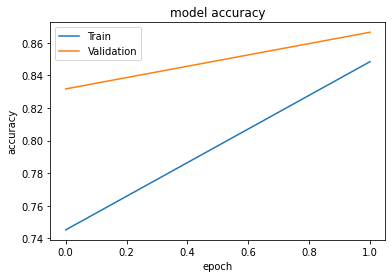

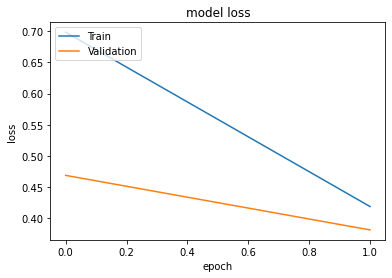

In [8]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Predicting the Test set results

In [9]:

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
pred = model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1) 


  1/125 [..............................] - ETA: 24s - loss: 0.5340 - accuracy: 0.8750

  9/125 [=>............................] - ETA: 0s - loss: 0.4032 - accuracy: 0.8611 

 18/125 [===>..........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.8542

 27/125 [=====>........................] - ETA: 0s - loss: 0.3871 - accuracy: 0.8576

 36/125 [=======>......................] - ETA: 0s - loss: 0.3775 - accuracy: 0.8602

 46/125 [==========>...................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8668

 55/125 [============>.................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8733

 63/125 [==============>...............] - ETA: 0s - loss: 0.3610 - accuracy: 0.8715

 72/125 [================>.............] - ETA: 0s - loss: 0.3631 - accuracy: 0.8702

 81/125 [==================>...........] - ETA: 0s - loss: 0.3593 - accuracy: 0.8727

 90/125 [====================>.........] - ETA: 0s - loss: 0.3522 - accuracy: 0.8760

 98/125 [======================>.......] - ETA: 0s - loss: 0.3543 - accuracy: 0.8740

107/125 [========================>.....] - ETA: 0s - loss: 0.3592 - accuracy: 0.8738

116/125 [==========================>...] - ETA: 0s - loss: 0.3644 - accuracy: 0.8704

125/125 [==============================] - ETA: 0s - loss: 0.3633 - accuracy: 0.8698

125/125 [==============================] - 1s 6ms/step - loss: 0.3633 - accuracy: 0.8698


Test loss: 0.3632700443267822
Test accuracy: 0.8697500228881836


## Evaluating the Model Performance

Accuracy Score: 0.86975
Precision Score: 0.8726935696964433
Recall Score: 0.932603881613196
F1 Score: 0.8704521620261952


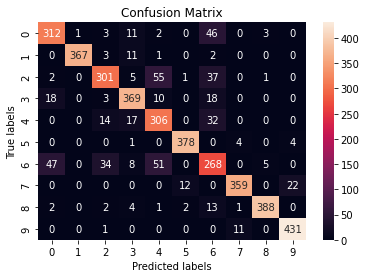

Elapsed CPU Time: 95.22 seconds


In [10]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')**0.5
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy Score: {acc}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm)           
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');           
plt.show()

time_stop = process_time()
cpu_time = round(time_stop - time_start, 2)
print(f'Elapsed CPU Time: {cpu_time} seconds')


## Saving Model Statistics

In [11]:

import os
import json

path = 'statistics'
if not os.path.exists(path):
    os.mkdir(path)

stats = {
    "Accuracy Score": acc,
    "Precision Score": precision,
    "Recall Score": recall,
    "F1 Score": f1,
    "cpu time": cpu_time,
    "predicted": y_pred.flatten().tolist(), 
    "real": y_true.to_numpy().flatten().tolist()
}

with open(os.path.join(path, "cnn_711033ec-7d48-11ec-b087-d7c57270a0f7.json"), "w") as f:
    json.dump(stats, f, ensure_ascii=False, indent=4)
